In [1]:
import pandas as pd
import numpy as np

In [3]:
file_path = "../data/nifty_features_5min.csv"

df = pd.read_csv(file_path, parse_dates=["datetime"])
df.set_index("datetime", inplace=True)

df.head()


,open,high,low,close,volume,ema_5,ema_15,ema_gap,returns,volatility,candle_range,candle_body,hour,minute,day_of_week,returns_lag_1,returns_lag_3,ema_gap_lag_1
datetime,,,,,,,,,,,,,,,,,,
2015-01-09 11:00:00,8285.75,8288.85,8282.30,8288.00,0,8285.789434,8286.208532,-0.419098,0.000278,0.000489,6.55,2.25,11,0,4,0.000127,0.000060,-1.268458
2015-01-09 11:05:00,8287.95,8288.10,8280.20,8281.55,0,8284.376289,8285.626216,-1.249927,-0.000778,0.000485,7.90,6.40,11,5,4,0.000278,0.000338,-0.419098
2015-01-09 11:10:00,8281.85,8286.35,8279.90,8282.35,0,8283.700860,8285.216689,-1.515829,0.000097,0.000465,6.45,0.50,11,10,4,-0.000778,0.000127,-1.249927
2015-01-09 11:15:00,8282.55,8283.20,8276.15,8278.45,0,8281.950573,8284.370853,-2.420280,-0.000471,0.000457,7.05,4.10,11,15,4,0.000097,0.000278,-1.515829
2015-01-09 11:20:00,8278.55,8280.70,8266.55,8266.55,0,8276.817049,8282.143246,-5.326197,-0.001437,0.000549,14.15,12.00,11,20,4,-0.000471,-0.000778,-2.420280


In [5]:
# Threshold to reduce noise
threshold = df["ema_gap"].std() * 0.1

df["regime"] = 0

df.loc[df["ema_gap"] > threshold, "regime"] = 1
df.loc[df["ema_gap"] < -threshold, "regime"] = -1


In [7]:
df["regime"].value_counts(normalize=True)


regime
 1    0.446972
-1    0.386446
 0    0.166581
Name: proportion, dtype: float64

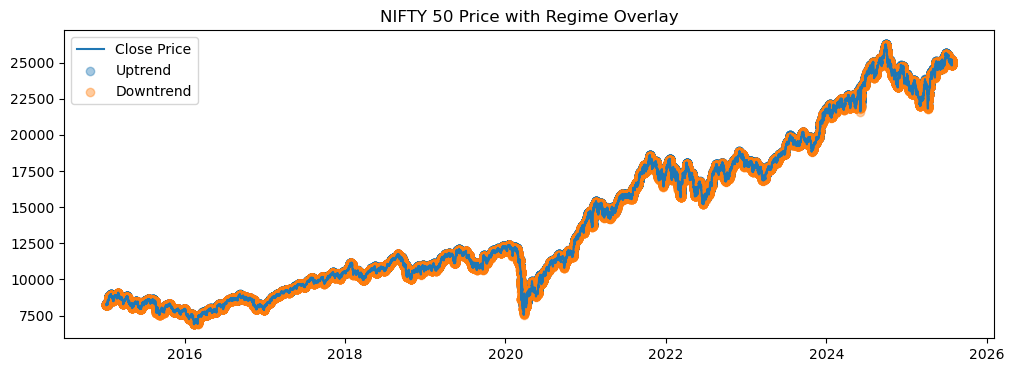

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df.index, df["close"], label="Close Price")

plt.scatter(df.index[df["regime"] == 1],
            df["close"][df["regime"] == 1],
            label="Uptrend", alpha=0.4)

plt.scatter(df.index[df["regime"] == -1],
            df["close"][df["regime"] == -1],
            label="Downtrend", alpha=0.4)

plt.legend()
plt.title("NIFTY 50 Price with Regime Overlay")
plt.show()


In [13]:
output_path = "../data/nifty_with_regime.csv"
df.to_csv(output_path)

print(f"Regime-labeled data saved to {output_path}")


Regime-labeled data saved to ../data/nifty_with_regime.csv
